In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
ews = pd.read_csv("/content/EastWestAirlinesConv.csv")
ews.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
ews.drop(['ID#'], axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
#Normalization function
scaler = StandardScaler()
scaled_ews_df = scaler.fit_transform(ews.iloc[:,1:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

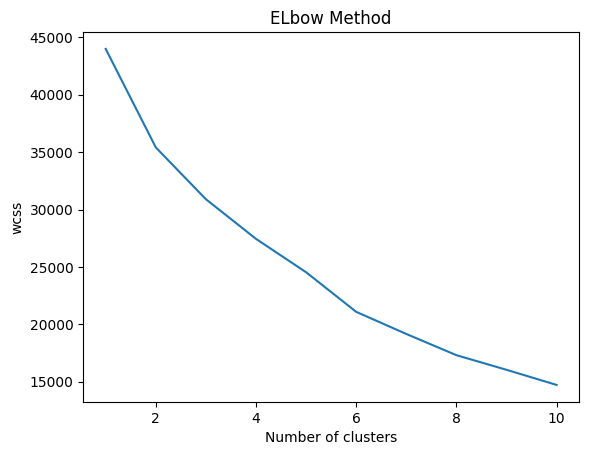

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(scaled_ews_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('ELbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
clusters_new = KMeans(6,random_state=42) # 42 to keep randomisation consistent
clusters_new.fit(scaled_ews_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [ ]:
clusters_new.labels_

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

In [ ]:
ews['clusterID'] = clusters_new.labels_

In [ ]:
ews

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [ ]:
ews.groupby('clusterID').agg(['mean']).reset_index()

,clusterID,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1594.881180,117252.014354,60.495215,3.704944,1.000000,1.001595,39256.378788,18.760766,347.125997,1.037480,4896.791866,0.649123
1,1,1743.867133,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
2,2,2239.169553,43519.741845,42.457511,1.226742,1.000000,1.000403,4605.759162,6.825614,198.250503,0.616593,3696.446234,0.198953
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,4,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
5,5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


Hence cluster ID = 1 has highest Balance avg